In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [590]:
data = pd.read_csv('Mean_Temp_IMD_02017.csv', parse_dates=True)

In [591]:
data.shape

(117, 18)

In [592]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [593]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333,24.278718,19.259060,26.087350,27.233333,21.880171
std,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912,0.436950,0.672593,0.609349,0.316021,0.549829
min,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000,23.560000,17.580000,24.890000,26.530000,20.960000
25%,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000,24.000000,18.850000,25.690000,27.060000,21.480000
50%,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000,24.150000,19.120000,26.030000,27.180000,21.820000
75%,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000,24.460000,19.610000,26.420000,27.340000,22.170000
max,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000,26.450000,22.250000,28.860000,28.500000,24.210000


In [594]:
data.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69,24.82,19.98,26.85,27.46,22.50
113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50,24.73,19.58,26.24,27.88,22.47
114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21,24.91,20.12,26.29,27.73,22.99
115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89,26.45,22.25,28.86,28.44,24.20
116,2017,20.59,23.08,25.58,29.17,30.47,29.44,28.31,28.12,28.11,27.24,23.92,21.47,26.29,21.84,28.41,28.50,24.21


In [595]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
YEAR       117 non-null int64
JAN        117 non-null float64
FEB        117 non-null float64
MAR        117 non-null float64
APR        117 non-null float64
MAY        117 non-null float64
JUN        117 non-null float64
JUL        117 non-null float64
AUG        117 non-null float64
SEP        117 non-null float64
OCT        117 non-null float64
NOV        117 non-null float64
DEC        117 non-null float64
ANNUAL     117 non-null float64
JAN-FEB    117 non-null float64
MAR-MAY    117 non-null float64
JUN-SEP    117 non-null float64
OCT-DEC    117 non-null float64
dtypes: float64(17), int64(1)
memory usage: 16.5 KB


In [596]:
data = data.astype(np.int64)

In [597]:
data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)

In [598]:
#data = data.replace([np.inf, -np.inf], np.nan, inplace=True)

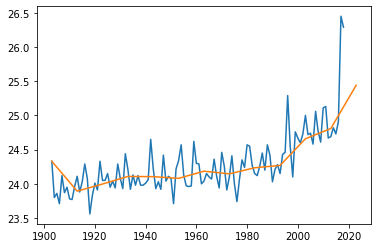

In [599]:
plt.plot(data_years.index, data_years['ANNUAL'],'-',markersize=1)
plt.plot(data_years_10.index, data_years_10['ANNUAL'],'-',markersize=1)


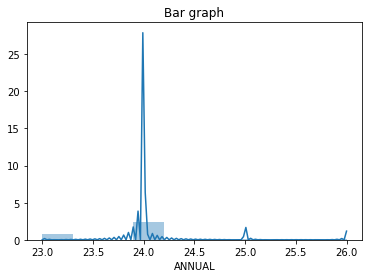

In [600]:
y = data['ANNUAL']
plt.figure();plt.title("Bar graph")
sns.distplot(y)

C:\Users\Raghu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


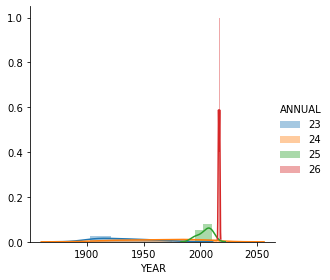

In [603]:
sns.FacetGrid(data, hue = "ANNUAL", size=4).map(sns.distplot, 'YEAR').add_legend()

<function matplotlib.pyplot.show(*args, **kw)>

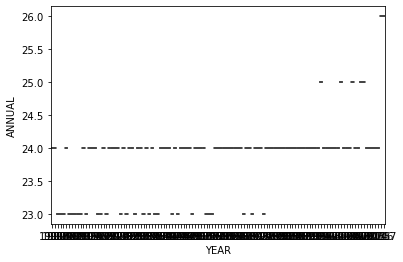

In [604]:
sns.boxplot(x= 'YEAR', y = "ANNUAL" , data = data )
plt.show

C:\Users\Raghu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Raghu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Raghu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

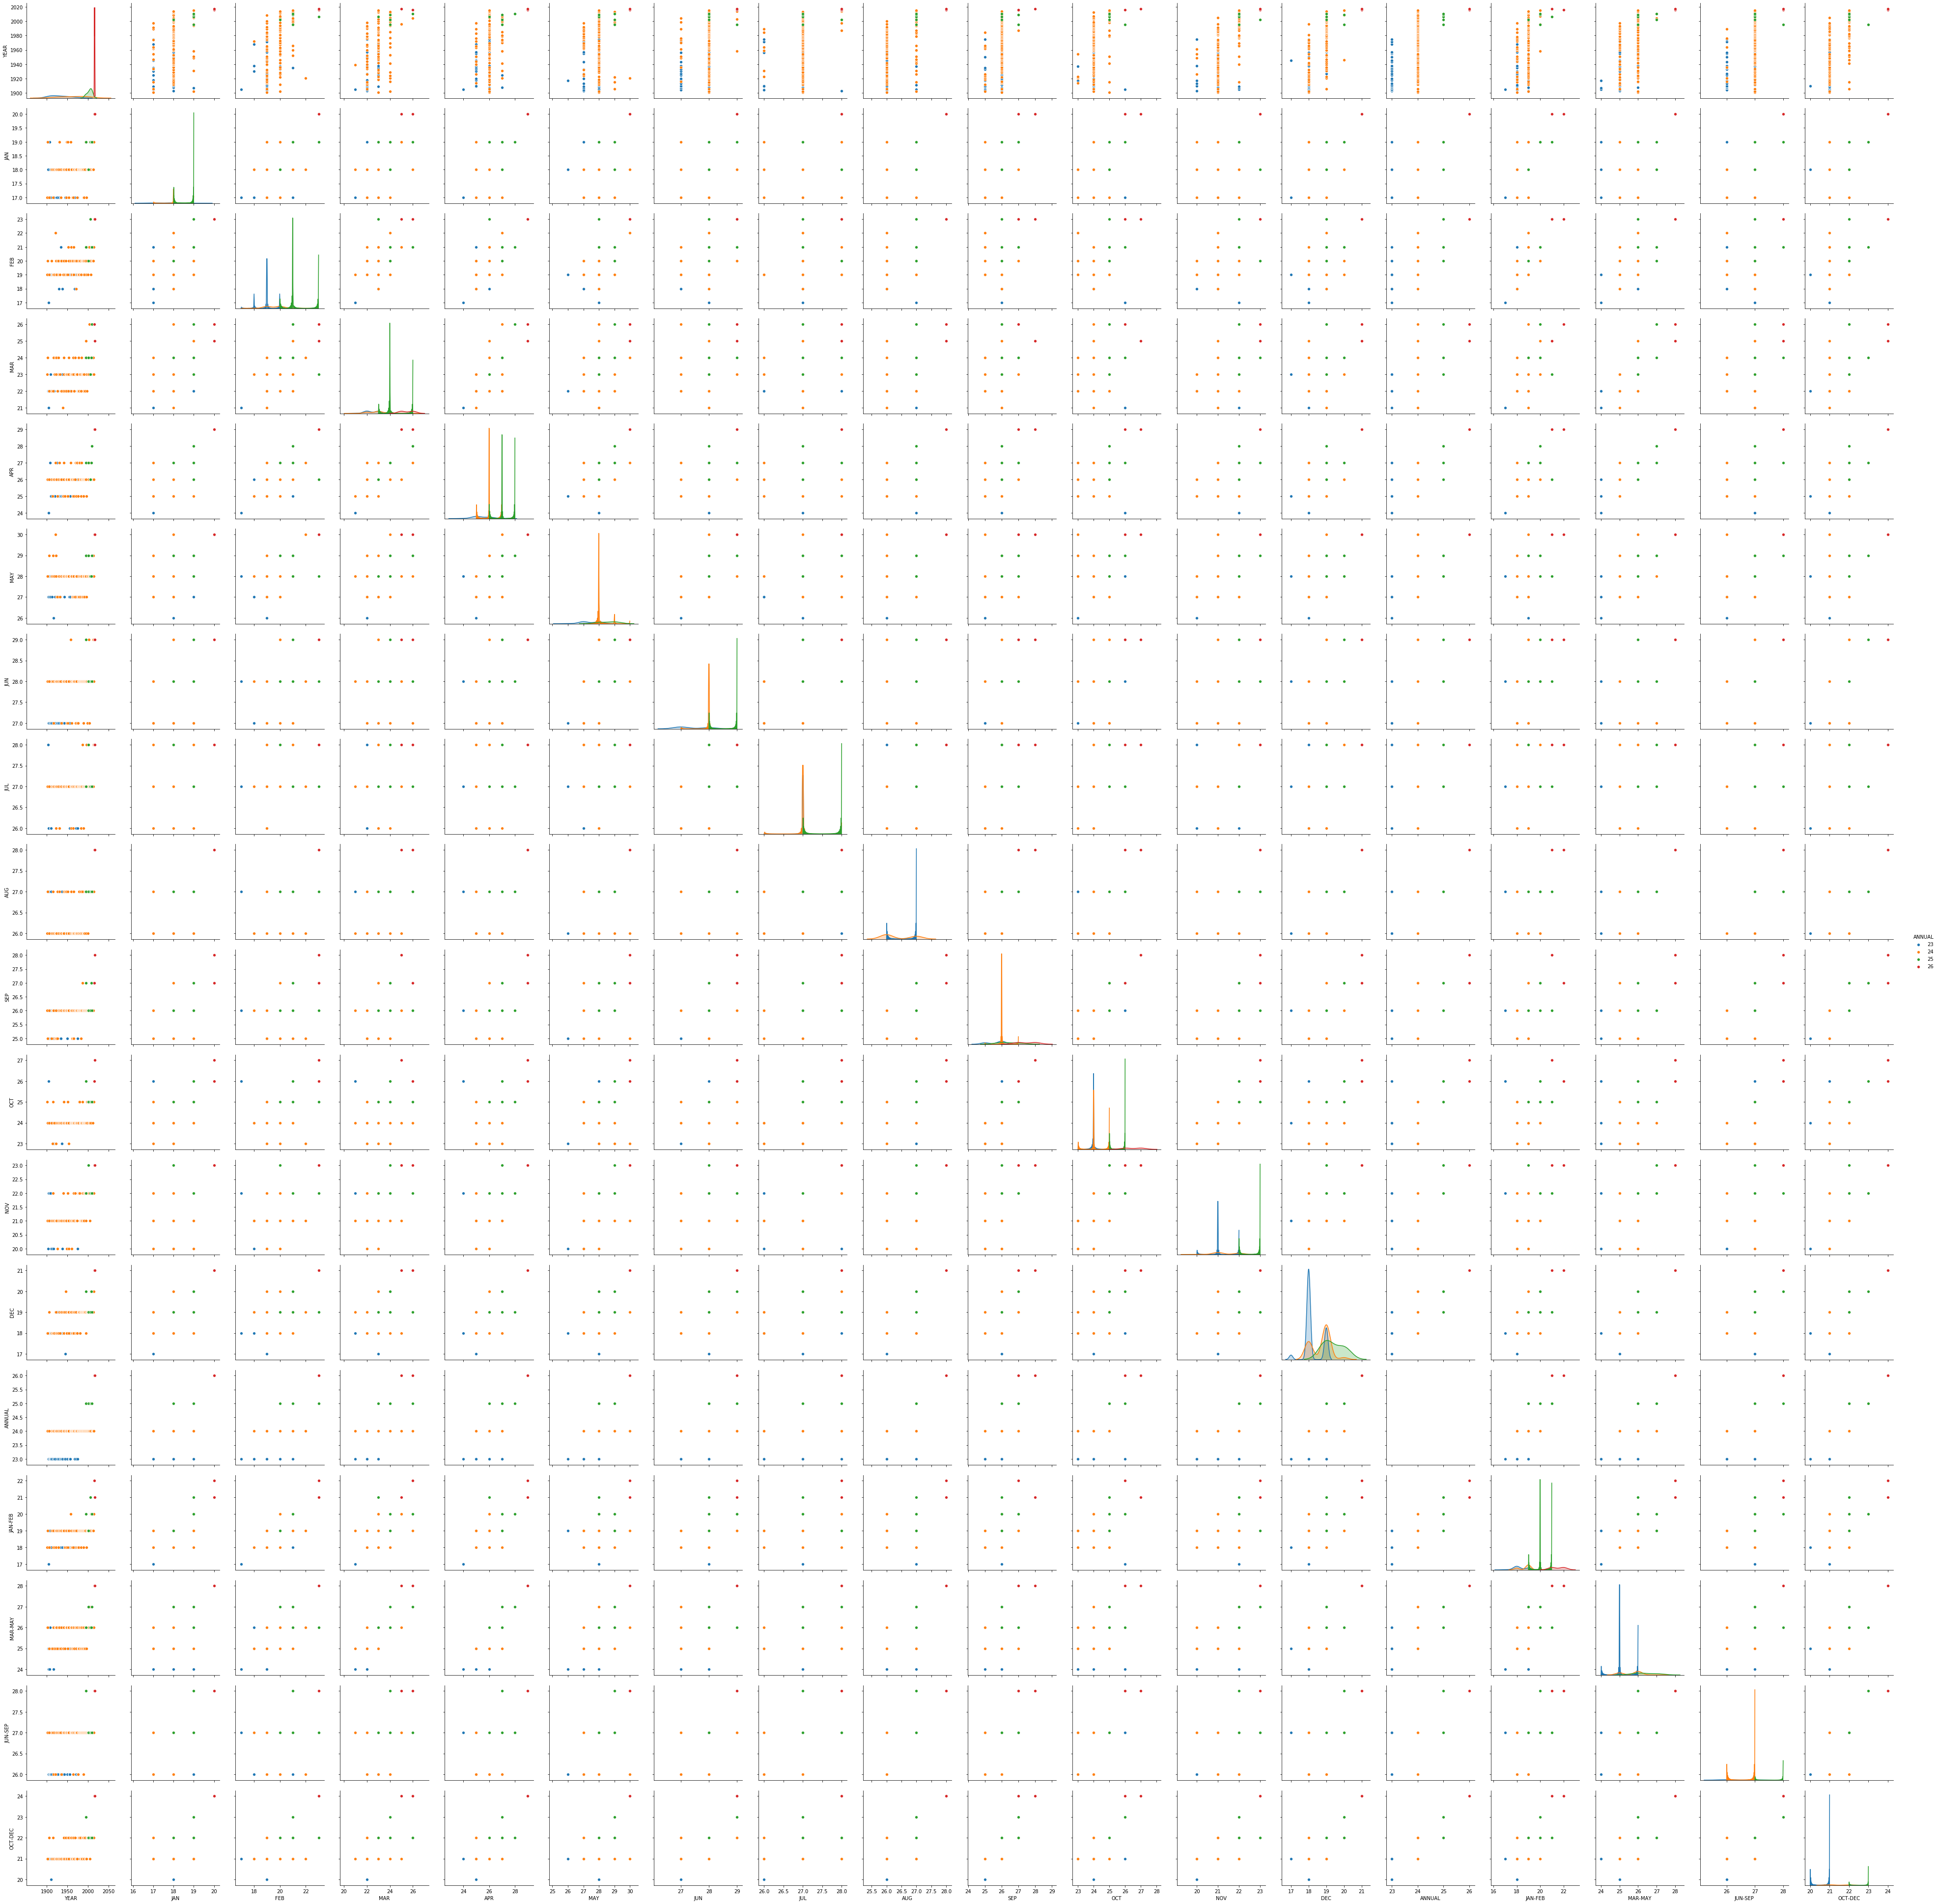

In [605]:
sns.pairplot(data, hue= 'ANNUAL', size=3)
plt.show

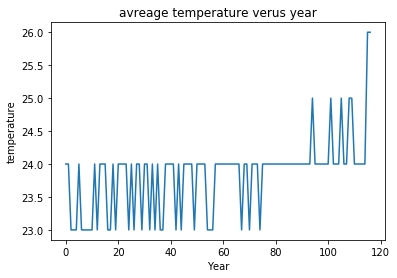

In [606]:
plt.plot(data['ANNUAL'])
plt.xlabel('Year')
plt.ylabel('temperature')
plt.title('avreage temperature verus year')
plt.show()

In [607]:
from sklearn.linear_model import LinearRegression as LinReg

In [608]:
x= data.drop(['YEAR','ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP','OCT-DEC'], axis = 1)
y = data['ANNUAL'].values

In [609]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
Accuracy = str(reg.score(x,y))
print('Model Accuracy:', Accuracy)

Model Accuracy: 0.6540290548549237


In [610]:
x = data['YEAR']
y = y

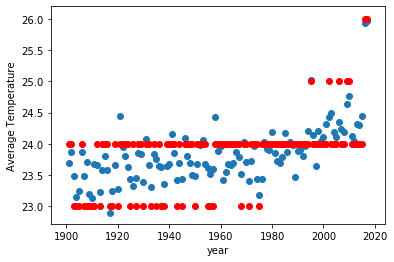

In [611]:
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x,y=y, c='r')
plt.ylabel('Average Temperature')
plt.xlabel('year')
plt.show()